In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df1=df.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
df1.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

array([[<AxesSubplot:title={'center':'Taxable.Income'}>,
        <AxesSubplot:title={'center':'City.Population'}>],
       [<AxesSubplot:title={'center':'Work.Experience'}>, <AxesSubplot:>]],
      dtype=object)

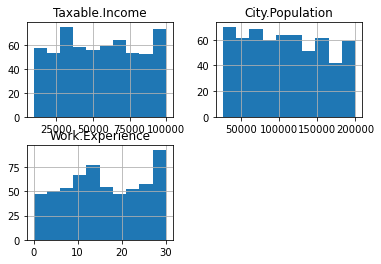

In [6]:
df1.hist()

C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


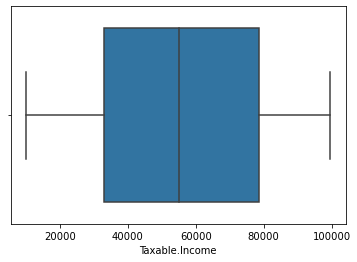

In [7]:
ax=sns.boxplot(df1['Taxable.Income'])

In [8]:
# There are no outliers.

In [9]:
df1.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [10]:
df1=pd.get_dummies(df1,columns=['Undergrad','Marital.Status','Urban'])
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [11]:
# We will now convert our target variable into categorical variable.

In [12]:
df1.loc[df1['Taxable.Income']>30000,'taxable.income']='Good'
df1.loc[df1['Taxable.Income']<=30000,'taxable.income']='Risky'

In [13]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable.income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Taxable.Income           600 non-null    int64 
 1   City.Population          600 non-null    int64 
 2   Work.Experience          600 non-null    int64 
 3   Undergrad_NO             600 non-null    uint8 
 4   Undergrad_YES            600 non-null    uint8 
 5   Marital.Status_Divorced  600 non-null    uint8 
 6   Marital.Status_Married   600 non-null    uint8 
 7   Marital.Status_Single    600 non-null    uint8 
 8   Urban_NO                 600 non-null    uint8 
 9   Urban_YES                600 non-null    uint8 
 10  taxable.income           600 non-null    object
dtypes: int64(3), object(1), uint8(7)
memory usage: 23.0+ KB


In [15]:
del df1['Taxable.Income']

In [16]:
df1

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable.income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   City.Population          600 non-null    int64 
 1   Work.Experience          600 non-null    int64 
 2   Undergrad_NO             600 non-null    uint8 
 3   Undergrad_YES            600 non-null    uint8 
 4   Marital.Status_Divorced  600 non-null    uint8 
 5   Marital.Status_Married   600 non-null    uint8 
 6   Marital.Status_Single    600 non-null    uint8 
 7   Urban_NO                 600 non-null    uint8 
 8   Urban_YES                600 non-null    uint8 
 9   taxable.income           600 non-null    object
dtypes: int64(2), object(1), uint8(7)
memory usage: 18.3+ KB


In [18]:
#Random Forest
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
array=df1.values
x=array[:,0:8]
y=array[:,9]

In [29]:
num_trees=200
max_features=3
kfold=KFold(n_splits=10)
model1=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result1=cross_val_score(model1,x,y,cv=kfold)
print(result1.mean())

0.7283333333333333


In [30]:
# Here we got accuracy of 72.8%

In [31]:
# Let's try Bagging and Boosting.

In [32]:
# Bagging
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array=df1.values
x=array[:,0:8]
y=array[:,9]
seed=7
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100
model2=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=seed)
result2=cross_val_score(model2,x,y,cv=kfold)
print(result2.mean())

0.7366666666666666


In [34]:
# Adaboost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
array=df1.values
x=array[:,0:8]
y=array[:,9]
seed=7
num_trees=100
kfold=KFold(n_splits=10)
model3=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
result3=cross_val_score(model3,x,y,cv=kfold)
print(result3.mean())

0.7733333333333332


In [35]:
# XG boost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv

In [36]:
df2=df1.copy()

In [37]:
df2

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,taxable.income
0,50047,10,1,0,0,0,1,0,1,Good
1,134075,18,0,1,1,0,0,0,1,Good
2,160205,30,1,0,0,1,0,0,1,Good
3,193264,15,0,1,0,0,1,0,1,Good
4,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,Good
596,55369,2,0,1,1,0,0,0,1,Good
597,154058,0,1,0,1,0,0,0,1,Good
598,180083,17,0,1,0,1,0,1,0,Good


In [38]:
df2.loc[df2['taxable.income']=='Good','Taxable.income']=1
df2.loc[df2['taxable.income']=='Risky','Taxable.income']=0

In [39]:
del df2['taxable.income']

In [40]:
df2

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Taxable.income
0,50047,10,1,0,0,0,1,0,1,1.0
1,134075,18,0,1,1,0,0,0,1,1.0
2,160205,30,1,0,0,1,0,0,1,1.0
3,193264,15,0,1,0,0,1,0,1,1.0
4,27533,28,1,0,0,1,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1,1.0
596,55369,2,0,1,1,0,0,0,1,1.0
597,154058,0,1,0,1,0,0,0,1,1.0
598,180083,17,0,1,0,1,0,1,0,1.0


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   City.Population          600 non-null    int64  
 1   Work.Experience          600 non-null    int64  
 2   Undergrad_NO             600 non-null    uint8  
 3   Undergrad_YES            600 non-null    uint8  
 4   Marital.Status_Divorced  600 non-null    uint8  
 5   Marital.Status_Married   600 non-null    uint8  
 6   Marital.Status_Single    600 non-null    uint8  
 7   Urban_NO                 600 non-null    uint8  
 8   Urban_YES                600 non-null    uint8  
 9   Taxable.income           600 non-null    float64
dtypes: float64(1), int64(2), uint8(7)
memory usage: 18.3 KB


In [43]:
array=df2.values
x=array[:,0:8]
y=array[:,9]
seed=7
test_size=0.33
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)
import time
st=time.time()
model4=XGBClassifier(n_estimators=100)
model4.fit(x_train,y_train)
end=time.time()
print('Time taken to train XGB model',end-st)

Time taken to train XGB model 0.5589027404785156


In [44]:
y_pred = model4.predict(x_test)
predictions = [round(value) for value in y_pred]


In [45]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.21%


In [46]:
# Light GBM

In [47]:
import lightgbm as lgb
d_train=lgb.Dataset(x_train,label=y_train)

In [48]:
d_train

In [49]:
params = {}
params['learning_rate'] = 0.002 #,0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [50]:
st = time.time()
clf = lgb.train(params, d_train, 100)
end = time.time()
print('time taken to train Light XGB model', end-st)

[LightGBM] [Info] Number of positive: 317, number of negative: 85
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 178
[LightGBM] [Info] Number of data points in the train set: 402, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.788557 -> initscore=1.316251
[LightGBM] [Info] Start training from score 1.316251
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [51]:
y_pred=clf.predict(x_test)

In [52]:
predictions1= [round(value) for value in y_pred]

In [53]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions1)
accuracy

0.803030303030303